# Implementing 2nd order polynomial regression with given samples

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

Mean square error를 정의해 봅시다.

$$ MSE = \frac{1}{n} \sum_{\textrm{for all i's}}(\hat{y_i}-y_i)^2$$
- $ \hat{y_i}$: predicted value 
- $ y_i$: true value

주요 아이디어는 그래디언트의 반대 방향으로 작은 단계를 반복적으로 수행하여 미분 가능 함수의 로컬 최소값을 찾는 것

![](https://miro.medium.com/v2/resize:fit:790/format:webp/1*4Wob-p3zS7V9hBPlJ6kJjA.png)

- 선형 회귀의 경우 로컬 최소값을 찾아 손실 함수(MSE)를 최소화해야 함을 의미함
- 따라서 그래디언트를 계산하고 반복적으로 반대 방향으로 작은 단계를 수행
- 그래디언트를 계산할 수 있으려면 몇 가지 작업이 필요함
    - 각 매개변수에 대한 손실 함수의 1차 편도함수를 도출해야 함

우선, loss function을 정의해 봅시다.
$$ \displaystyle \hat{y_i} = w_1x_i^2 + w_2x_i + b $$
$$ \displaystyle \mathcal{L}(w, b) = \frac{1}{2n}\sum_{i=0}^{N-1}(\hat{y_i}-y_i)^2 $$

In [2]:
def calc_loss(w1, w2, b, x, y):
    n = len(x)
    return (1/(2*n))*((w1 * x**2 + w2 * x + b - y)**2).sum()

In [3]:
def calc_dldw1(w1, w2, b, x, y):
    n = len(x)
    output = 0
    for ind in range(n):
        output += (w1 * x[ind]**2 + w2 * x[ind] + b - y[ind]) * x[ind]**2
    output = output / n
    return output

In [4]:
def calc_dldw2(w1, w2, b, x, y):
    n = len(x)
    output = 0
    for ind in range(n):
        output += (w1 * x[ind]**2 + w2 * x[ind] + b - y[ind]) * x[ind]
    output = output / n
    return output

In [5]:
def calc_dldb(w1, w2, b, x, y):
    n = len(x)
    output = 0
    for ind in range(n):
        output += (w1 * x[ind]**2 + w2 * x[ind] + b - y[ind])
    output = output / n
    return output

## Revise the codes below, according to the environment and compare the parameters with $w_1 = 1.01$, $w_2 = - 21.6$, and $b = 116.05$.

우리는 $w$와 $b$에 대해 모르니, 랜덤하게 초기화합니다.

In [6]:
w1_esti = 10*np.random.rand(1)
w2_esti = 10*np.random.rand(1)
b_esti = 10*np.random.rand(1)
print(w1_esti, w2_esti, b_esti)

[4.62769978] [5.01400618] [0.35870955]


현재의 cost를 계산합니다.

In [7]:
x = perch_length
y = perch_weight
x.size

56

In [8]:
calc_loss(w1_esti, w2_esti, b_esti, x, y)

9238837.789182542

샘플 중 랜덤하게 10개 선택합시다.

In [9]:
idx = np.random.randint(x.size, size=10)

Iteration 이후 $w$와 $b$가 증가할지 감소할지 예상해 봅시다.

In [10]:
print(calc_dldw1(w1_esti, w2_esti, b_esti, x[idx], y[idx]))
print(calc_dldw2(w1_esti, w2_esti, b_esti, x[idx], y[idx]))
print(calc_dldb(w1_esti, w2_esti, b_esti, x[idx], y[idx]))

[2967979.12047272]
[89821.62713478]
[3004.46557172]


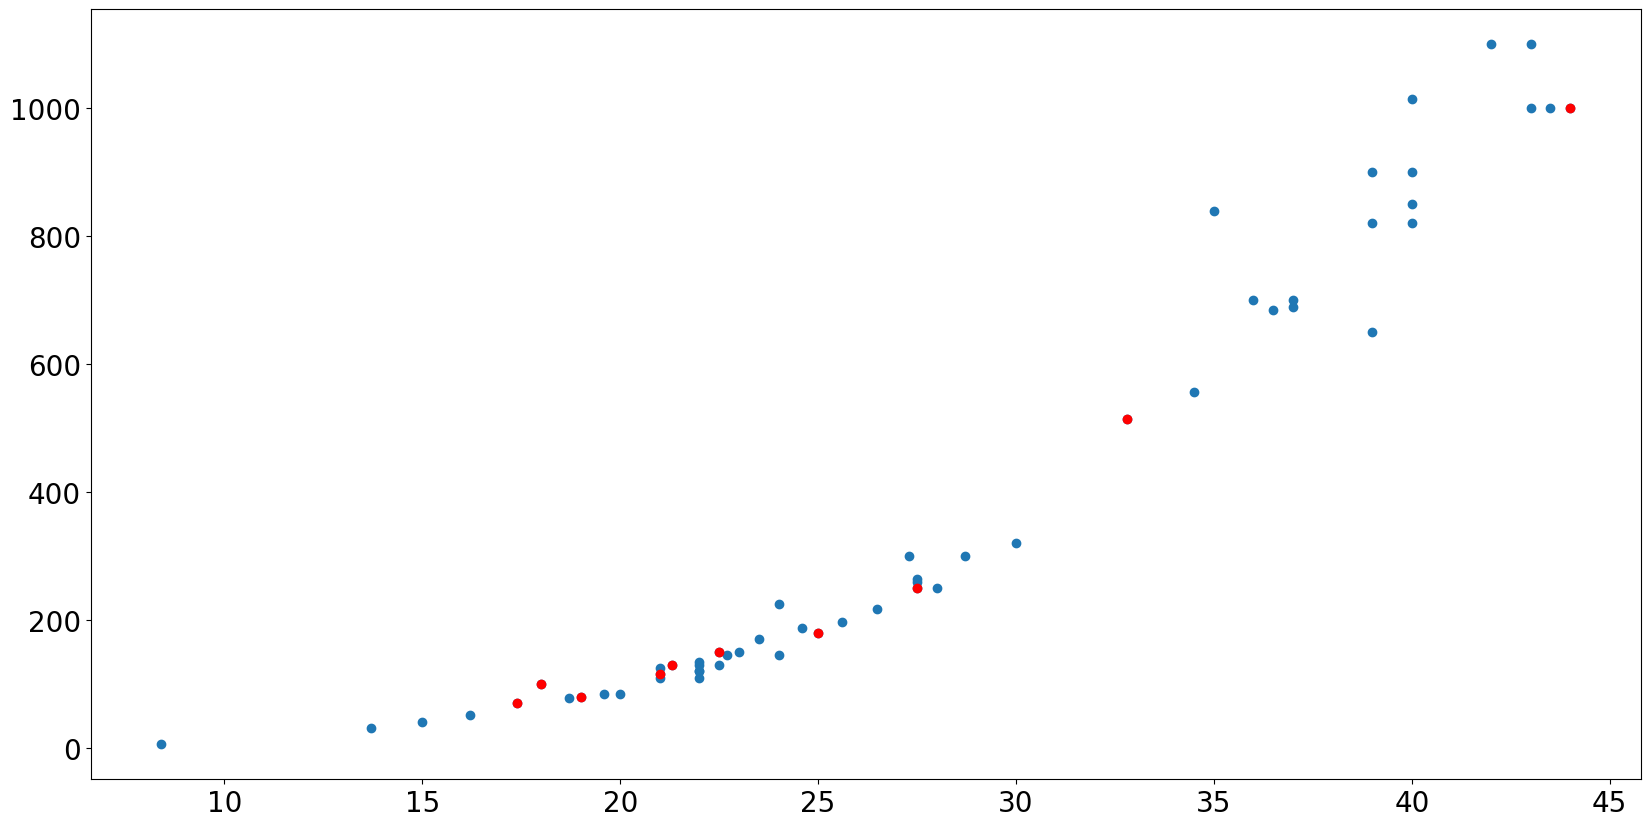

In [11]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)
plt.rc('font', size=20)

plt.scatter(x, y)
plt.scatter(x[idx], y[idx], c='r')
plt.show()

In [12]:
print(f"w_estimation_prev: {w1_esti}, {w2_esti}, b_estimation_prev: {b_esti}")
dldw1 = calc_dldw1(w1_esti, w2_esti, b_esti, x[idx], y[idx])
dldw2 = calc_dldw1(w1_esti, w2_esti, b_esti, x[idx], y[idx])
dldb = calc_dldb(w1_esti, w2_esti, b_esti, x[idx], y[idx])

w_estimation_prev: [4.62769978], [5.01400618], b_estimation_prev: [0.35870955]


In [13]:
alpha = 0.000001

w1_esti = w1_esti - alpha*dldw1
w2_esti = w1_esti - alpha*dldw2
b_esti = b_esti - alpha*dldb
print(f"w_estimation_curr: {w1_esti}, {w2_esti}, b_estimation_curr: {b_esti}")

w_estimation_curr: [1.65972066], [-1.30825846], b_estimation_curr: [0.35570509]


NN error for 1: 3087.101797686836
NN error for 10: 2139.124976606127
NN error for 20: 1840.3106342899891
Poly error: 1628.9069085971432


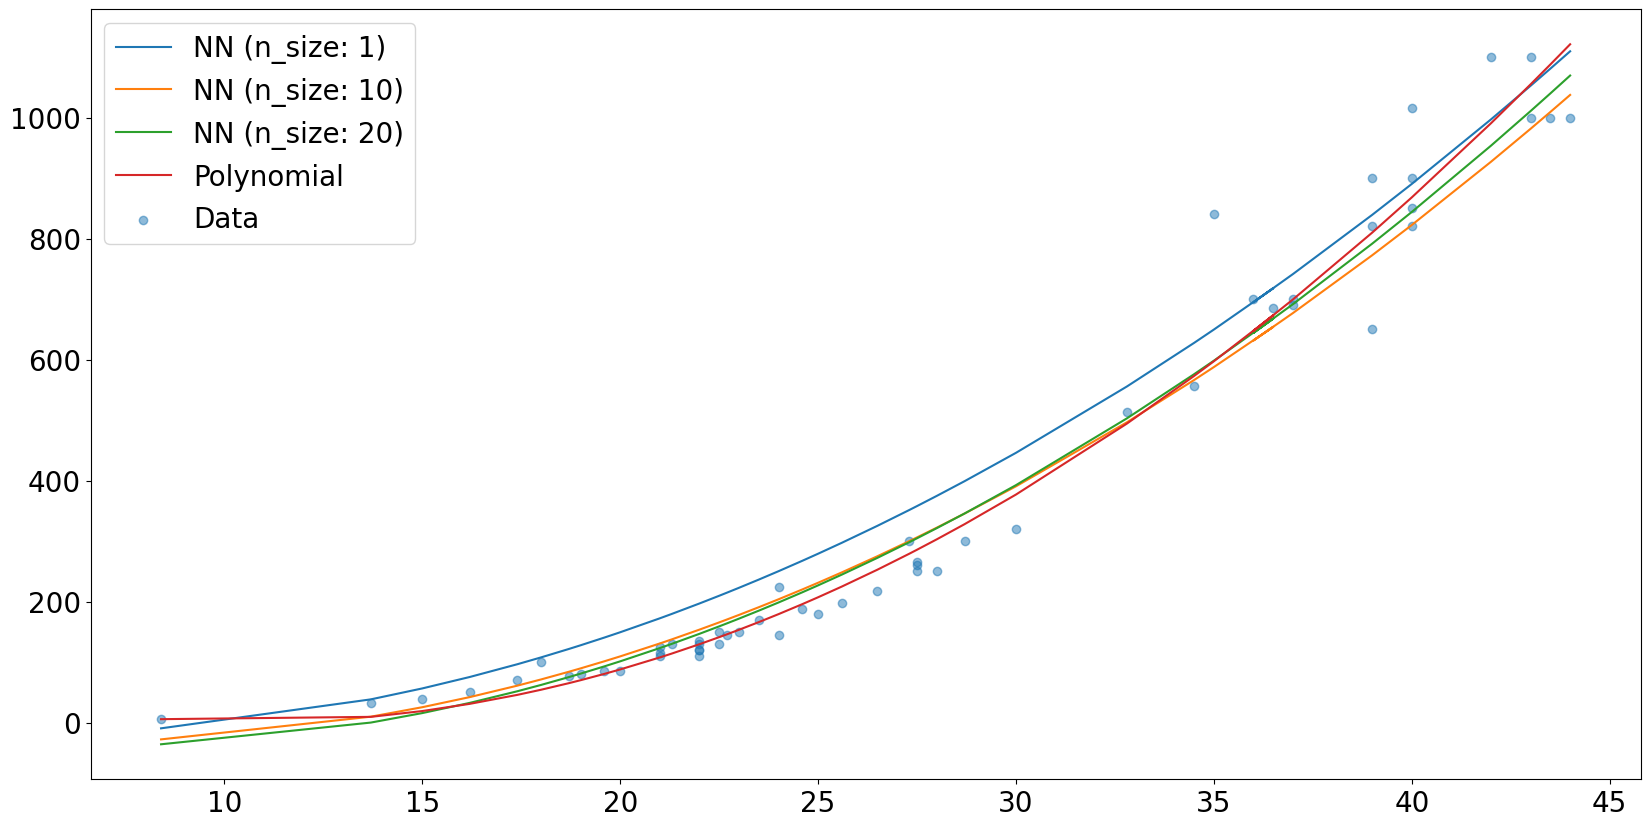

In [14]:
for n_size in [1, 10, 20]:
    for iter in range(10000):
        # if iter % 100 == 0:
        #     print(f"Trial: {iter}")
        #     print(f"Current error: {calc_loss(w1_esti, w2_esti, b_esti, x, y)}")
        #     print(f"w_esti: {w1_esti.round(4)}, {w2_esti.round(4)}, b_esti: {b_esti.round(4)}")
        idx = np.random.randint(x.size, size=n_size)
        dldw1 = calc_dldw1(w1_esti, w2_esti, b_esti, x[idx], y[idx])
        dldw2 = calc_dldw2(w1_esti, w2_esti, b_esti, x[idx], y[idx])
        dldb = calc_dldb(w1_esti, w2_esti, b_esti, x[idx], y[idx])
        w1_esti = w1_esti - alpha*dldw1
        w2_esti = w2_esti - alpha*dldw2
        b_esti = b_esti - alpha*dldb
    print(f"NN error for {n_size}: {calc_loss(w1_esti, w2_esti, b_esti, x, y)}")
    plt.plot(x, w1_esti * x**2 + w2_esti * x + b_esti, label=f'NN (n_size: {n_size})')

w1_poly = 1.01
w2_poly = -21.6
b_poly = 116.05
print(f"Poly error: {calc_loss(w1_poly, w2_poly, b_poly, x, y)}")
plt.plot(x, w1_poly * x**2 + w2_poly * x + b_poly, label='Polynomial')
plt.scatter(x, y, alpha=0.5, label='Data')
plt.legend()
plt.show()

## 성능이 떨어지거나 시뮬레이션이 잘 안되는 이유
- 1. activation function의 부재
    - Neurons may be activated when the weighted sum is larger than bias.
    - It is better that the weighted sum of the neurons within the output layer is a 'probability', like logistic regression.
- 2. 너무 얕은 neural network
- 3. 너무 적은 샘플 개수
- 4. w1, w2, b의 스케일이 너무 다름 (compared to normal NNs)
- 5. not normalized (하이퍼파라미터 alpha의 조정으로 보완 가능)
    - $(1 - 0.5)^2 = 0.25, (10 - 5)^2 = 25$